## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Feature Engineering

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.drop(labels = ["id", "yr_renovated"], axis = 'columns', inplace = True)

In [6]:
data['date'] = data['date'].apply(pd.Timestamp)
data['yr_built'] = data['yr_built'].apply(pd.Timestamp)

In [7]:
time_diff = data['date'] - data['yr_built']
def get_years(val):
    return val.days / 365

In [8]:
data.insert(3, "age_of_house", time_diff.apply(get_years))

In [9]:
data.head()

,date,price,bedrooms,age_of_house,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,44.808219,1.00,1180,5650,1.0,0,0,3,7,1180,0,1970-01-01 00:00:00.000001955,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,44.964384,2.25,2570,7242,2.0,0,0,3,7,2170,400,1970-01-01 00:00:00.000001951,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,45.178082,1.00,770,10000,1.0,0,0,3,6,770,0,1970-01-01 00:00:00.000001933,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,44.964384,3.00,1960,5000,1.0,0,0,5,7,1050,910,1970-01-01 00:00:00.000001965,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,45.158904,2.00,1680,8080,1.0,0,0,3,8,1680,0,1970-01-01 00:00:00.000001987,98074,47.6168,-122.045,1800,7503


In [10]:
data = data.drop(labels = ['date', 'yr_built', 'zipcode', 'long'], axis = 'columns')

In [11]:
data.tail()

,price,bedrooms,age_of_house,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15
21608,360000.0,3,44.410959,2.50,1530,1131,3.0,0,0,3,8,1530,0,47.6993,1530,1509
21609,400000.0,4,45.172603,2.50,2310,5813,2.0,0,0,3,8,2310,0,47.5107,1830,7200
21610,402101.0,2,44.501370,0.75,1020,1350,2.0,0,0,3,7,1020,0,47.5944,1020,2007
21611,400000.0,3,45.068493,2.50,1600,2388,2.0,0,0,3,8,1600,0,47.5345,1410,1287
21612,325000.0,2,44.813699,0.75,1020,1076,2.0,0,0,3,7,1020,0,47.5941,1020,1357


## Data Preprocessing

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   age_of_house   21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


In [13]:
for column in data.columns:
    if data[column].dtype == 'float64':
        data[column] = data[column].astype('float32')
    elif data[column].dtype == 'int64':
        data[column] = data[column].astype('int16')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float32
 1   bedrooms       21613 non-null  int16  
 2   age_of_house   21613 non-null  float32
 3   bathrooms      21613 non-null  float32
 4   sqft_living    21613 non-null  int16  
 5   sqft_lot       21613 non-null  int16  
 6   floors         21613 non-null  float32
 7   waterfront     21613 non-null  int16  
 8   view           21613 non-null  int16  
 9   condition      21613 non-null  int16  
 10  grade          21613 non-null  int16  
 11  sqft_above     21613 non-null  int16  
 12  sqft_basement  21613 non-null  int16  
 13  lat            21613 non-null  float32
 14  sqft_living15  21613 non-null  int16  
 15  sqft_lot15     21613 non-null  int16  
dtypes: float32(5), int16(11)
memory usage: 886.6 KB


In [15]:
data.corr()

,price,bedrooms,age_of_house,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15
price,1.000000,0.308350,-0.004357,0.525138,0.702035,0.019698,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.307003,0.585379,0.033091
bedrooms,0.308350,1.000000,-0.016800,0.515884,0.576671,0.059478,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.008931,0.391638,0.043406
age_of_house,-0.004357,-0.016800,1.000000,-0.034410,-0.034559,0.014213,-0.022491,0.001356,-0.001800,-0.050769,-0.039912,-0.027924,-0.019469,-0.032856,-0.031515,0.004303
bathrooms,0.525138,0.515884,-0.034410,1.000000,0.754665,-0.032029,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.024573,0.568634,-0.034793
sqft_living,0.702035,0.576671,-0.034559,0.754665,1.000000,0.015131,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.052530,0.756420,0.013400
sqft_lot,0.019698,0.059478,0.014213,-0.032029,0.015131,1.000000,-0.141248,0.034840,0.060878,0.040304,-0.023500,-0.012115,0.054069,-0.045173,0.019188,0.524727
floors,0.256794,0.175429,-0.022491,0.500653,0.353949,-0.141248,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.049614,0.279885,-0.136191
waterfront,0.266369,-0.006582,0.001356,0.063744,0.103818,0.034840,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.014274,0.086463,0.048922
view,0.397293,0.079532,-0.001800,0.187737,0.284611,0.060878,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.006157,0.280439,0.087790
condition,0.036362,0.028472,-0.050769,-0.124982,-0.058753,0.040304,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.014941,-0.092824,0.044963


## EDA

In [16]:
plt.style.use("fivethirtyeight")

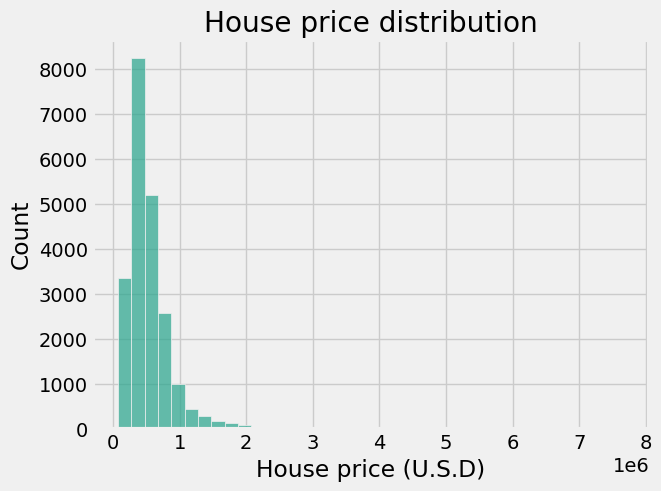

In [17]:
sns.histplot(x = "price", data = data, bins = np.arange(75_000, 77_00_000, 200_000), color = "#32a891")
plt.title("House price distribution")
plt.xlabel("House price (U.S.D)")
plt.show()

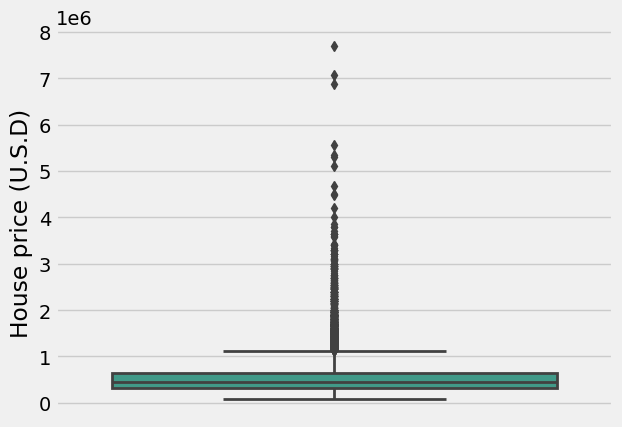

In [18]:
sns.boxplot(y = "price", data = data, color = "#32a891", linewidth = 2)
plt.ylabel("House price (U.S.D)")
plt.show()

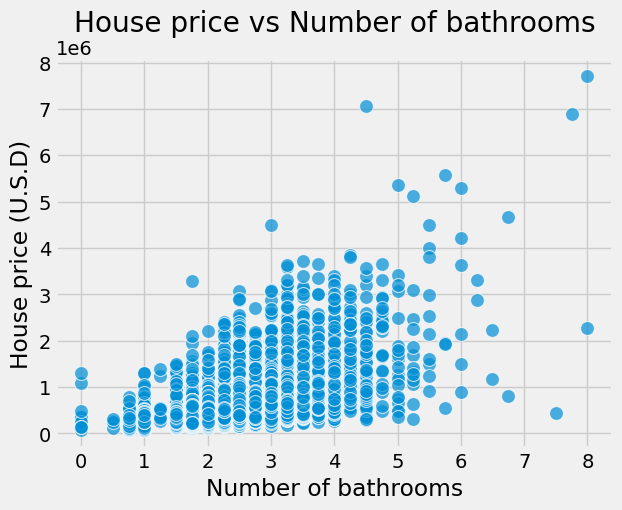

In [19]:
sns.scatterplot(x = "bathrooms", y = "price", data = data, s = 100, alpha = 0.7)
plt.xlabel("Number of bathrooms")
plt.ylabel("House price (U.S.D)")
plt.title("House price vs Number of bathrooms")
plt.show()

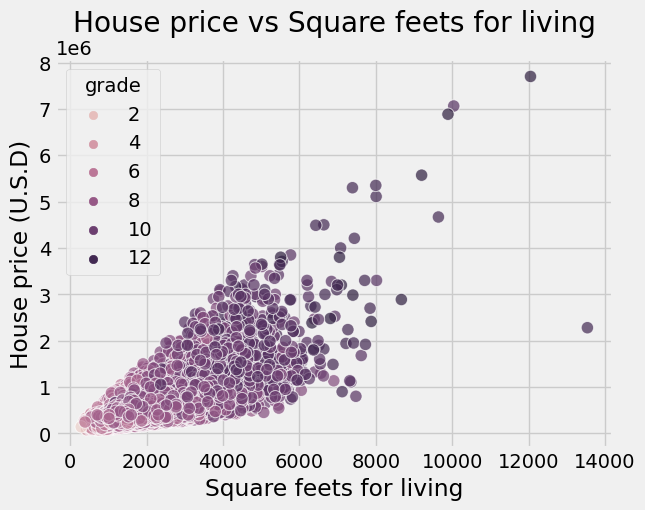

In [20]:
sns.scatterplot(x = "sqft_living", y = "price", data = data, color = "#eb5234",s = 80, alpha = 0.7, hue = 'grade')
plt.xlabel("Square feets for living")
plt.ylabel("House price (U.S.D)")
plt.title("House price vs Square feets for living")
plt.show()

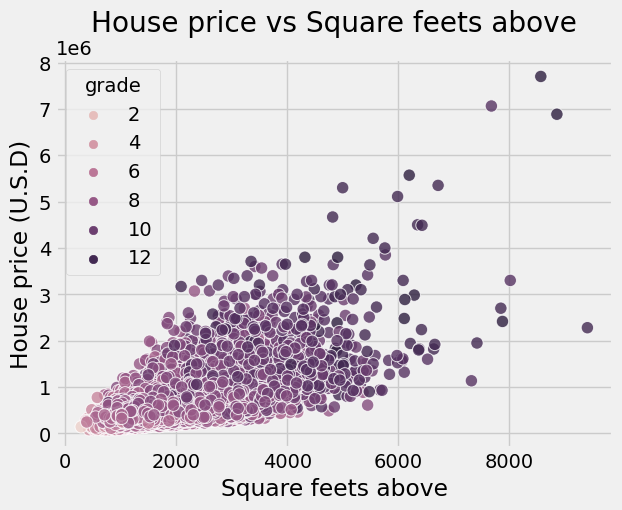

In [21]:
sns.scatterplot(x = "sqft_above", y = "price", data = data, color = "#cc34eb",s = 80, alpha = 0.8, hue = 'grade')
plt.xlabel("Square feets above")
plt.ylabel("House price (U.S.D)")
plt.title("House price vs Square feets above")
plt.show()

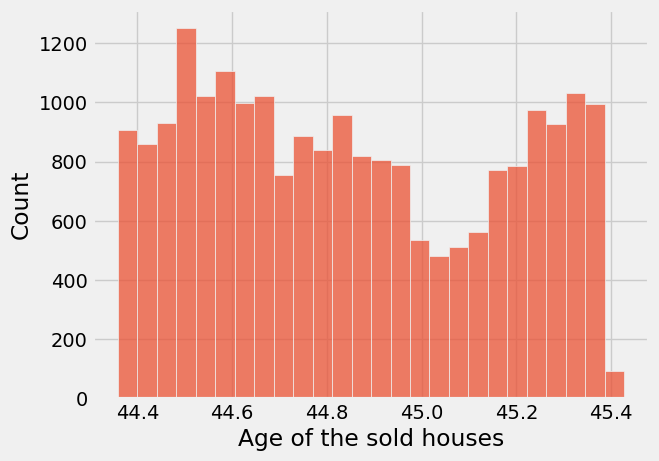

In [22]:
sns.histplot(x = "age_of_house", data = data, color = "#eb5234")
plt.xlabel("Age of the sold houses")
plt.show()

## Feature and label extraction

In [23]:
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

## Train and test set split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model building

### `Linear Regression` model

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs = -1)
lin_reg.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

### Prediction

In [27]:
Y_pred = lin_reg.predict(X_test)

### K fold cross validation

In [28]:
from sklearn.model_selection import cross_validate
cross_val = cross_validate(estimator = lin_reg, X = X_train, y = Y_train, cv = 10, scoring = 'r2', n_jobs = -1, return_train_score = True)

print(f"Average train score : {cross_val['train_score'].mean() :.3f}")
print(f"Average test score : {cross_val['test_score'].mean() :.3f}")

Average train score : 0.669
Average test score : 0.666


### r2_score

In [29]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6627794540441325

## `Decision Tree` model

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, Y_train)

DecisionTreeRegressor()

### Grid search

In [29]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [40, 50, 60, 70],
    'min_samples_split' : [2, 3, 4, 5, 7, 10],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_impurity_decrease' : [0.1, 0.001, 0.01, 1]
}
grid = GridSearchCV(estimator = dtree, cv = 10, n_jobs = -1, param_grid = params, scoring = 'r2')
grid.fit(X_train, Y_train)

print(f"Best score : {grid.best_score_}")
print(f"Best score : {grid.best_params_}")

Best score : 0.709631368888067
Best score : {'max_depth': 70, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 7, 'min_samples_split': 5}


In [32]:
dtree = DecisionTreeRegressor(max_depth = 70, min_impurity_decrease = 0.001, min_samples_leaf = 7, min_samples_split = 5)
dtree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=70, min_impurity_decrease=0.001,
                      min_samples_leaf=7, min_samples_split=5)

### K fold cross validation

In [33]:
cross_val = cross_validate(estimator = dtree, X = X_train, y = Y_train, cv = 10, scoring = 'r2', n_jobs = -1, return_train_score = True)

print(f"Average train score : {cross_val['train_score'].mean() :.3f}")
print(f"Average test score : {cross_val['test_score'].mean() :.3f}")

Average train score : 0.891
Average test score : 0.709


### Prediction

In [34]:
Y_pred = dtree.predict(X_test)

### R2 Score

In [35]:
r2_score(Y_test, Y_pred)

0.7668468035741789

## `Random forest` model

In [36]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators = 150, n_jobs = -1)
rforest.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=150, n_jobs=-1)

### K fold cross validation

In [35]:
cross_val = cross_validate(estimator = rforest, X = X_train, y = Y_train, cv = 10, scoring = 'r2', n_jobs = -1, return_train_score = True)

print(f"Average train score : {cross_val['train_score'].mean() :.3f}")
print(f"Average test score : {cross_val['test_score'].mean() :.3f}")

Average train score : 0.975
Average test score : 0.813


### Prediction and R2 score

In [37]:
Y_pred = rforest.predict(X_test)
print(r2_score(Y_test, Y_pred))

0.8404305531734746


## 

## `XGBoost` model

In [38]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_jobs = -1, n_estimators = 200, subsample = 0.9)
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### K fold cross validation

In [39]:
cross_val = cross_validate(estimator = xgb, X = X_train, y = Y_train, cv = 5, scoring = 'r2', n_jobs = -1, return_train_score = True)

print(f"Average train score : {cross_val['train_score'].mean() :.3f}")
print(f"Average test score : {cross_val['test_score'].mean() :.3f}")

Average train score : 0.984
Average test score : 0.799


### Prediction and R2 score

In [40]:
Y_pred = xgb.predict(X_test)
r2_score(Y_test, Y_pred)

0.8400156264969482

## `CatBoost` model

In [41]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor()

In [45]:
cbr.fit(X_train, Y_train, verbose = 0)

### K fold cross validation

In [49]:
cross_val = cross_validate(estimator = cbr, X = X_train, y = Y_train, cv = 5, scoring = 'r2', return_train_score = True, n_jobs=-1)

print(f"Average train score : {cross_val['train_score'].mean() :.3f}")
print(f"Average test score : {cross_val['test_score'].mean() :.3f}")

Average train score : 0.945
Average test score : 0.842


### Prediction

In [47]:
Y_pred = cbr.predict(X_test)

### R2 score

In [48]:
r2_score(Y_test, Y_pred)

0.8589795252603449

## `CatBoost` performing best 

### `R2 score` : `0.86` (rounded upto 2 decimal places)